<a href="https://colab.research.google.com/github/0xfffddd/Coding/blob/main/dnn_mnist_HW_Lichen_Mao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - DNN
Lichen Mao

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## Preprocessing

In [3]:
# the data, shuffled and split between train and test sets
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
input_dim = 784 # 28*28
X_train = X_train_pre.reshape(X_train_pre.shape[0], input_dim)
X_test = X_test_pre.reshape(X_test_pre.shape[0], input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 784)
60000 train samples, 10000 test samples


In [5]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)

In [6]:
validation_split = 0.166667
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]


## The models

### Build the model **1**

In [20]:
# this model is a 784-input perception with no hidden layer for multi-class classification.
# ReLU is used as sctivation function

model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(10, activation='relu'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7447 - loss: 0.9393 - val_accuracy: 0.9087 - val_loss: 0.2982
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9239 - loss: 0.2500 - val_accuracy: 0.9402 - val_loss: 0.1938
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9440 - loss: 0.1821 - val_accuracy: 0.9472 - val_loss: 0.1757
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9544 - loss: 0.1502 - val_accuracy: 0.9598 - val_loss: 0.1311
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9660 - loss: 0.1135 - val_accuracy: 0.9670 - val_loss: 0.1113
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9726 - loss: 0.0909 - val_accuracy: 0.9681 - val_loss: 0.1051
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9788 - loss: 0.0697 - val_accuracy: 0.9706 - val_loss: 0.0954
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9818 - loss: 0.0614 - val_accuracy: 

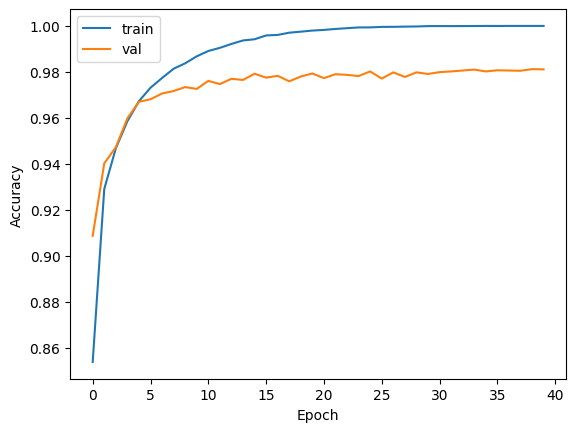

In [28]:
#Start train a model with 40 EPOCHS with 64 samples per batch
EPOCHS = 40

history = model.fit(X_train, y_train,
                    batch_size=64, epochs=EPOCHS,
                    validation_data=(X_val, y_val))

# I also draw the accuracy for each epoch during training:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

In [30]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))
# the result above ↑ is only 98.03%, as in training the accuracy has already hit 1.00, that means the model is over-fitted.



Testing set accuracy: 98.03%


### Build the model **2**

In [32]:
# this model is still a 784-input perception. I use two-fully connected NN in this model.
# sigmoid is used as sctivation function
# The hidden layer neuro amount is set to 128, 256

model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(10, activation='sigmoid'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])



In [33]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#Start train a model with 20 EPOCHS with 64 samples per batch (40 epoches seems too much in model1)
EPOCHS = 20

history = model.fit(X_train, y_train,
                    batch_size=64, epochs=EPOCHS,
                    validation_data=(X_val, y_val))

# accuracy figure is draw for each epoch during training:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9218 - loss: 0.2586 - val_accuracy: 0.9332 - val_loss: 0.2144
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9440 - loss: 0.1857 - val_accuracy: 0.9463 - val_loss: 0.1814
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9573 - loss: 0.1417 - val_accuracy: 0.9452 - val_loss: 0.1755
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9657 - loss: 0.1120 - val_accuracy: 0.9623 - val_loss: 0.1236
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9741 - loss: 0.0875 - val_accuracy: 0.9668 - val_loss: 0.1086
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9783 - loss: 0.0731 - val_accuracy: 0.9716 - val_loss: 0.0947
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9818 - loss: 0.0636 - val_accuracy: 0.9687 - val_loss: 0.1023
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9843 - loss: 0.0545 - val_accuracy: 0.

In [36]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))
# the result above ↑ is 98.09%, slight improved than model1, but the model is still too over-fitted.

Testing set accuracy: 98.09%


### Build the model **3**

In [37]:
# to avoid overfit, this model I use one-fully connected NN in this model. Early stopping will be applied when training model
# sigmoid is used as sctivation function
# The hidden layer neuro amount is set to 64

model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10, activation='sigmoid'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])


In [38]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#Start train a model with 15 EPOCHS with 64 samples per batch
#patience set to be 2
EPOCHS = 15

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


history = model.fit(X_train, y_train,
                    batch_size=64, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])


# accuracy figure is draw for each epoch during training:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7839 - loss: 0.9497 - val_accuracy: 0.9159 - val_loss: 0.3099
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9182 - loss: 0.2893 - val_accuracy: 0.9345 - val_loss: 0.2349
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9352 - loss: 0.2273 - val_accuracy: 0.9441 - val_loss: 0.1994
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9463 - loss: 0.1880 - val_accuracy: 0.9502 - val_loss: 0.1778
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9534 - loss: 0.1649 - val_accuracy: 0.9564 - val_loss: 0.1611
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9589 - loss: 0.1442 - val_accuracy: 0.9573 - val_loss: 0.1495
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9634 - loss: 0.1279 - val_accuracy: 0.9615 - val_loss: 0.1394
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9669 - loss: 0.1193 - val_accuracy: 0.

In [40]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))
# the result above ↑ is 97.06%, compare to model1 and 2, this model is not fit-enough.

Testing set accuracy: 97.06%


Conclusion:
Recommendations for the hyperparameter--
1. activation function has no big difference if the epoches are high
2. batch size and number of epochs: 64-256 sample per batch seems suitable, it balanced time and accuracy.15-20 epoches looks decent.
3. Number of layers: One layers has already enough.
4. In this case, using early stopping have minor effect on the accurcy, but it can decrease the train time significantlly.